In [10]:
words = '高鐵辦捐血活動 董座江耀宗帶頭挽袖'
seg = jieba.cut(words)
print(" ".join(seg))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Wade\AppData\Local\Temp\jieba.cache
Loading model cost 0.768 seconds.
Prefix dict has been built succesfully.


'高鐵辦 捐血 活動   董座 江耀宗 帶頭 挽袖'

### 增加特定詞彙

In [2]:
jieba.load_userdict("user.txt")

### 移除符號(像是冒號與問號)和數字
python regex移除數字

In [5]:
import re
some_text = 'test:123?'
re.sub("\d+|\?|\:", "", some_text)

'test'

---

## 1. 讀取csv並切割字串

In [12]:
import csv
import jieba

strings = []
labels = []

with open('sentences.csv', newline='') as csvfile:
  rows = csv.reader(csvfile)
  for row in rows:
    strings.append(" ".join(jieba.cut(re.sub("\d+|\?|\:|\？|\\r\\n", "", row[0]))))

In [14]:
strings

['高鐵辦 捐血 活動   董座 江耀宗 帶頭 挽袖',
 '高鐵局 ： 延伸 花 億   到 屏東 只 快 分鐘',
 '高鐵 延至 屏東 恐花 億元 、 卻 只 比台 鐵快 分鐘',
 '機 捷通 車   台北 車站 成大迷 宮台 鐵 ： 將改進',
 '高鐵 捐血 傳愛     董事 長 帶頭作 公益',
 '高雄捷 運去 年度 首度 盈餘萬元',
 '桃捷 徵才 逾 萬人 報考     錄取 率僅 %',
 '爭取 高鐵到 屏東   青年 組聯盟 號召 支持',
 '高捷 賺 了     衝運量 兼 擴大勞務',
 '機捷 A 台北 站 轉乘     吉祥物 VR 影片 來 帶路',
 '催淚   視障 女 高鐵站 為 阿母 獻 唱 「 感謝 你 的 愛 」',
 '周一 晨間 列車 自由 座     高鐵 增為 節車 廂',
 '高鐵班 周一 晨間 列車 加開 自由 座   運能 提升',
 '北捷 雞 年 紀念 車票     日開 賣',
 '傳聞 多   桃 市府 日 公布 機捷 正式 通車 時間',
 '機捷 何時 通車     桃捷 日 宣布',
 '機捷 可望 元宵 通車   桃捷 ： 尚未 取得 營運許 可 \u3000',
 '機捷 履勘 改善 完成     交部將 發營 運許 可',
 '三鐵共站 動線 不 友善     議員促 左營 站 改善',
 '二二八 連假 高鐵 加班 車     日 凌晨 賣',
 '高鐵 周年   外籍 顧問 自發 揪 團回 台灣',
 '高鐵連假 加班 車   周六 開放 訂票',
 '機場 捷運營 運許 可及 通車 時間     日 公布',
 '張 花冠 宣布   日起 至 元宵 節兩條 電動 公車 路線 免費 搭',
 '機場 捷運何 時通 鄭文燦 ： 今年 月初',
 '機捷 試營運 方案   下午 A 站 說 明細節',
 '記者 團試 乘 機捷 直達車   實測 到 機場 時間 是 ...',
 '機捷試 乘遇 地震     減速 慢行 秒',
 '桃園 機場 捷運 ／ 試營運   ／ 正式 通車',
 '機捷 / 起試 營運個 月   / 正式 營運',
 '機捷 試營運 / 預辦 登機   限時 後 航班',
 '機捷 免費試 乘團 體限站   自由 行全線 進出',
 '機 捷通 車成 真 

## 2. 讀取切好字的csv

In [1]:
import numpy as np
import pandas as pd
# 避免 tf warning的顯示
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

DF = pd.read_csv('title1-8_final.csv')
DF.head()

,Title,Title_CKIP,Category
0,捷運間隔5分鐘放人進站 人潮塞爆國父紀念館站,捷運 間隔 5分鐘 放 人 進站 人潮 塞爆 國父 紀念館 站,t
1,高捷延至兩點收班 夢時代跨年人潮1小時散去,高捷 延至 兩 點收 班 夢時代 跨年 人潮 1 小時 散去,t
2,31日北捷運量226.7萬人 比前年少40萬人,31 日 北 捷運 量 226.7 萬 人 比 前 年少 40萬 人,t
3,北捷跨年輸運減少38萬人次 是因假日沒上班族,北捷 跨年 輸運 減少 38萬 人次 是 因 假日 沒 上班族,t
4,元旦連假收尾 高鐵烏日站午後湧人潮,元旦 連假 收尾 高鐵 烏日站 午後 湧 人潮,t


In [20]:
DF.isnull().sum()

Title         1
Title_CKIP    1
Category      1
dtype: int64

Drop整row na

In [2]:
DF.dropna(axis=0, inplace=True)

In [3]:
segement = DF['Title_CKIP'].copy()
segement = segement.astype(str)
label = DF['Category'].copy()

#### 檢視資料類別占比

In [4]:
DF.groupby('Category').size()/ len(DF)

Category
e    0.246037
o    0.443143
s    0.082012
t    0.228808
dtype: float64

#### label做one hot

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# le = LabelEncoder()
# label_le = le.fit_transform(label)

one_hot = OneHotEncoder()
label_ohe = one_hot.fit_transform(DF[['Category']])
label_ohe_array = label_ohe.toarray()
print(label_ohe_array)
print(one_hot.get_feature_names())

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
['x0_e' 'x0_o' 'x0_s' 'x0_t']


In [38]:
segement.values[0]

'捷運\u3000間隔\u30005分鐘\u3000放\u3000人\u3000進站\u3000人潮\u3000塞爆\u3000國父\u3000紀念館\u3000站'

**將\u3000以空格取代**

In [5]:
import re
for index in range(segement.size):
    segement.values[index] = re.sub("\\u3000", " ", segement.values[index])
    segement.values[index] = re.sub("\d+|\?|\:|\？|\「|\」|\！|\：|\、|\【|\】", "", segement.values[index])

In [43]:
segement.values[0]

'捷運 間隔 5分鐘 放 人 進站 人潮 塞爆 國父 紀念館 站'

#### Tokenize and to numbers

In [6]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(segement.values)
string_sequences = tokenizer.texts_to_sequences(segement.values)

Using TensorFlow backend.


顯示字典

In [8]:
tokenizer.word_index

{'高鐵': 1,
 '捷運': 2,
 '機捷': 3,
 '北捷': 4,
 '加開': 5,
 '列車': 6,
 '站': 7,
 '日': 8,
 '搭': 9,
 '疏運': 10,
 '折': 11,
 '人': 12,
 '優惠': 13,
 '月': 14,
 '班': 15,
 '通車': 16,
 '起': 17,
 '旅客': 18,
 '不': 19,
 '桃捷': 20,
 '一': 21,
 '了': 22,
 '班次': 23,
 '連假': 24,
 '人潮': 25,
 '將': 26,
 '機場捷運': 27,
 '營運': 28,
 '最': 29,
 '年': 30,
 '開放': 31,
 '萬': 32,
 '票': 33,
 '有': 34,
 '高捷': 35,
 '再': 36,
 '乘': 37,
 '車': 38,
 '試': 39,
 '台北': 40,
 '搶': 41,
 '春節': 42,
 '個': 43,
 '到': 44,
 '元': 45,
 '班車': 46,
 '免費': 47,
 '推': 48,
 '北上': 49,
 '今': 50,
 '台灣高鐵': 51,
 '首': 52,
 '台鐵': 53,
 '要': 54,
 '可': 55,
 '民眾': 56,
 '台灣': 57,
 '柯': 58,
 '送': 59,
 '開': 60,
 '凌晨': 61,
 '的': 62,
 '輕': 63,
 '車票': 64,
 '桃園': 65,
 '北': 66,
 '是': 67,
 '自由座': 68,
 '開賣': 69,
 '快': 70,
 '車廂': 71,
 '跨年': 72,
 '前': 73,
 '元旦': 74,
 '票價': 75,
 '新': 76,
 '被': 77,
 '加班車': 78,
 '天': 79,
 '全': 80,
 '軌道': 81,
 '捷': 82,
 '高': 83,
 '多': 84,
 '大': 85,
 '公車': 86,
 '遭': 87,
 '軌': 88,
 '在': 89,
 '台中': 90,
 '更': 91,
 '人次': 92,
 '沒': 93,
 '台南': 94,
 '與': 95,
 '這': 96,
 

檢查詞頻

In [8]:
tokenizer.word_counts

OrderedDict([('捷運', 222),
             ('間隔', 1),
             ('5分鐘', 1),
             ('放', 4),
             ('人', 68),
             ('進站', 2),
             ('人潮', 49),
             ('塞爆', 4),
             ('國父', 1),
             ('紀念館', 1),
             ('站', 101),
             ('高捷', 43),
             ('延至', 4),
             ('兩', 18),
             ('點收', 1),
             ('班', 64),
             ('夢時代', 2),
             ('跨年', 25),
             ('1', 30),
             ('小時', 13),
             ('散去', 1),
             ('31', 3),
             ('日', 42),
             ('北', 28),
             ('量', 5),
             ('226', 1),
             ('7', 14),
             ('萬', 12),
             ('比', 17),
             ('前', 25),
             ('年少', 1),
             ('40萬', 1),
             ('北捷', 129),
             ('輸運', 1),
             ('減少', 1),
             ('38萬', 1),
             ('人次', 22),
             ('是', 28),
             ('因', 6),
             ('假日', 6),
             ('沒', 22),
   

輸入的資料筆數(row)

In [9]:
tokenizer.document_count

1451

dictionary實際size

In [10]:
len(tokenizer.word_index)

4020

**截長補短**

In [7]:
from keras.preprocessing import sequence

sequence_padded = sequence.pad_sequences(string_sequences, maxlen=15)
sequence_padded

array([[   0,    0,    0, ..., 1643, 1644,    7],
       [   0,    0,    0, ...,   25,  159, 1646],
       [   0,    0,    0, ..., 1647,   32,   12],
       ...,
       [   0,    0,    0, ..., 1640, 1641,    7],
       [   0,    0,    0, ..., 1640, 1641,    7],
       [   0,    0,    0, ...,  507,  698,  912]])

In [10]:
sequence_padded.shape

(1452, 15)

切割測試集與訓練集

**檢查詞頻(另一種方式)**

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv_result = cv.fit_transform(segement.values)

words = cv.get_feature_names()
# 計算詞頻
frequency = cv_result.toarray().sum(axis=0)

In [17]:
WordDF =  pd.DataFrame(
    {'Words': words,
     'Frequency': frequency
    })

WordDF.sort_values(by=['Frequency'], ascending=False).head(10)

,Words,Frequency
3455,高鐵,653
1530,捷運,222
1941,機捷,154
708,北捷,129
677,加開,117
624,列車,112
2283,疏運,74
521,優惠,68
3056,通車,63
1734,旅客,61


### Embedding layer

將數字list轉化為vector list

#### input length由句子長度決定, input dim由字典數決定

### MLP

In [16]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.embeddings import Embedding

model_MLP = Sequential()

model_MLP.add(Embedding(output_dim=64, input_dim=len(tokenizer.word_index), input_length=15))
model_MLP.add(Dropout(0.2))

model_MLP.add(Flatten())

model_MLP.add(Dense(units=128, activation='relu' ))
model_MLP.add(Dense(units=64, activation='relu' ))
model_MLP.add(Dense(units=32, activation='relu' ))
model_MLP.add(Dropout(0.4))

model_MLP.add(Dense(units=4, activation='softmax' ))

model_MLP.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 15, 64)            257280    
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 960)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               123008    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)      

In [19]:
model_MLP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history_MLP = model_MLP.fit(sequence_padded, label_ohe,batch_size=30, epochs=40,verbose=2, validation_split=0.2)

Train on 1160 samples, validate on 291 samples
Epoch 1/40
 - 0s - loss: 0.0057 - acc: 0.9983 - val_loss: 3.9477 - val_acc: 0.5979
Epoch 2/40
 - 0s - loss: 0.0046 - acc: 0.9966 - val_loss: 3.9535 - val_acc: 0.6082
Epoch 3/40
 - 0s - loss: 0.0048 - acc: 0.9974 - val_loss: 4.2482 - val_acc: 0.5808
Epoch 4/40
 - 0s - loss: 0.0052 - acc: 0.9957 - val_loss: 4.0474 - val_acc: 0.5911
Epoch 5/40
 - 0s - loss: 0.0066 - acc: 0.9974 - val_loss: 4.1775 - val_acc: 0.5945
Epoch 6/40
 - 0s - loss: 0.0069 - acc: 0.9974 - val_loss: 4.3756 - val_acc: 0.5842
Epoch 7/40
 - 0s - loss: 0.0076 - acc: 0.9957 - val_loss: 4.1270 - val_acc: 0.5670
Epoch 8/40
 - 0s - loss: 0.0097 - acc: 0.9957 - val_loss: 4.0699 - val_acc: 0.5704
Epoch 9/40
 - 0s - loss: 0.0070 - acc: 0.9966 - val_loss: 3.7886 - val_acc: 0.5945
Epoch 10/40
 - 0s - loss: 0.0111 - acc: 0.9948 - val_loss: 3.8973 - val_acc: 0.5842
Epoch 11/40
 - 0s - loss: 0.0087 - acc: 0.9983 - val_loss: 4.0516 - val_acc: 0.5842
Epoch 12/40
 - 0s - loss: 0.0107 - acc

### RNN

### LSTM

In [28]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.embeddings import Embedding
from keras.layers import Bidirectional, CuDNNLSTM

model_LSTM = Sequential()

model_LSTM.add(Embedding(output_dim=128, input_dim=len(tokenizer.word_index), input_length=15))
model_LSTM.add(Dropout(0.4))

model_LSTM.add(CuDNNLSTM(32, return_sequences=True))
model_LSTM.add(CuDNNLSTM(32, return_sequences=True))
model_LSTM.add(CuDNNLSTM(32, return_sequences=False))

model_LSTM.add(Dense(units=50, activation='relu' ))
model_LSTM.add(Dropout(0.4))
model_LSTM.add(Dense(units=4, activation='softmax' ))

model_LSTM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 15, 128)           640000    
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 128)           0         
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 15, 32)            20736     
_________________________________________________________________
cu_dnnlstm_4 (CuDNNLSTM)     (None, 15, 32)            8448      
_________________________________________________________________
cu_dnnlstm_5 (CuDNNLSTM)     (None, 32)                8448      
_________________________________________________________________
dense_12 (Dense)             (None, 50)                1650      
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
__________

**有做one hot的label就不能用loss = sparse_categorical_crossentropy**

> https://stackoverflow.com/questions/49392972/error-when-checking-target-expected-dense-3-to-have-shape-3-but-got-array-wi

In [30]:
model_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history_LSTM = model_LSTM.fit(sequence_padded, label_ohe, batch_size=100, epochs=30, verbose=2, validation_split=0.2)

Train on 1160 samples, validate on 291 samples
Epoch 1/30
 - 1s - loss: 0.0121 - acc: 0.9974 - val_loss: 2.8684 - val_acc: 0.5945
Epoch 2/30
 - 0s - loss: 0.0095 - acc: 0.9974 - val_loss: 2.8206 - val_acc: 0.5979
Epoch 3/30
 - 0s - loss: 0.0095 - acc: 0.9974 - val_loss: 3.0308 - val_acc: 0.5945
Epoch 4/30
 - 0s - loss: 0.0081 - acc: 0.9974 - val_loss: 3.4984 - val_acc: 0.5979
Epoch 5/30
 - 0s - loss: 0.0068 - acc: 0.9974 - val_loss: 3.0688 - val_acc: 0.5773
Epoch 6/30
 - 0s - loss: 0.0058 - acc: 0.9974 - val_loss: 3.0980 - val_acc: 0.5773
Epoch 7/30
 - 0s - loss: 0.0045 - acc: 0.9974 - val_loss: 3.2512 - val_acc: 0.5911
Epoch 8/30
 - 0s - loss: 0.0043 - acc: 0.9983 - val_loss: 3.3558 - val_acc: 0.5876
Epoch 9/30
 - 0s - loss: 0.0057 - acc: 0.9983 - val_loss: 3.4013 - val_acc: 0.6082
Epoch 10/30
 - 0s - loss: 0.0052 - acc: 0.9974 - val_loss: 3.5947 - val_acc: 0.6014
Epoch 11/30
 - 0s - loss: 0.0062 - acc: 0.9983 - val_loss: 3.4107 - val_acc: 0.5876
Epoch 12/30
 - 0s - loss: 0.0039 - acc

### GRU

In [20]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.embeddings import Embedding
from keras.layers import GRU

model_GRU = Sequential()

model_GRU.add(Embedding(output_dim=128, input_dim=len(tokenizer.word_index), input_length=15))
model_GRU.add(Dropout(0.4))

# model_GRU.add(GRU(32, return_sequences=True))
model_GRU.add(GRU(32, return_sequences=False))

model_GRU.add(Dense(units=50, activation='relu' ))
model_GRU.add(Dropout(0.4))
model_GRU.add(Dense(units=4, activation='softmax' ))

model_GRU.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 15, 128)           514560    
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 128)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                15456     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                1650      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 204       
Total params: 531,870
Trainable params: 531,870
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_GRU.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history_GRU = model_GRU.fit(sequence_padded, label_ohe, batch_size=50, epochs=30, verbose=2, validation_split=0.2)

Train on 1160 samples, validate on 291 samples
Epoch 1/30
 - 1s - loss: 0.0097 - acc: 0.9974 - val_loss: 2.5004 - val_acc: 0.6082
Epoch 2/30
 - 0s - loss: 0.0062 - acc: 0.9983 - val_loss: 2.9393 - val_acc: 0.6082
Epoch 3/30
 - 0s - loss: 0.0151 - acc: 0.9948 - val_loss: 2.2233 - val_acc: 0.6151
Epoch 4/30
 - 0s - loss: 0.0091 - acc: 0.9948 - val_loss: 2.3379 - val_acc: 0.6082
Epoch 5/30
 - 0s - loss: 0.0030 - acc: 1.0000 - val_loss: 2.6804 - val_acc: 0.6151
Epoch 6/30
 - 0s - loss: 0.0042 - acc: 0.9983 - val_loss: 2.6816 - val_acc: 0.6117
Epoch 7/30
 - 0s - loss: 0.0072 - acc: 0.9983 - val_loss: 2.8323 - val_acc: 0.6117
Epoch 8/30
 - 0s - loss: 0.0050 - acc: 0.9974 - val_loss: 2.8886 - val_acc: 0.6117
Epoch 9/30
 - 0s - loss: 0.0055 - acc: 0.9974 - val_loss: 2.6528 - val_acc: 0.6082
Epoch 10/30
 - 0s - loss: 0.0047 - acc: 0.9966 - val_loss: 2.8053 - val_acc: 0.6220
Epoch 11/30
 - 0s - loss: 0.0044 - acc: 0.9983 - val_loss: 2.9424 - val_acc: 0.6186
Epoch 12/30
 - 0s - loss: 0.0058 - acc

### Bidirectional

In [25]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.embeddings import Embedding
from keras.layers import GRU, Bidirectional

model_bi = Sequential()

model_bi.add(Embedding(output_dim=128, input_dim=len(tokenizer.word_index), input_length=15))
model_bi.add(Dropout(0.4))

# model_bi.add(Bidirectional(GRU(32, return_sequences=True)))
model_bi.add(Bidirectional(GRU(32)))

model_bi.add(Dense(units=50, activation='relu'))
model_bi.add(Dropout(0.4))
model_bi.add(Dense(units=4, activation='softmax'))

model_bi.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 15, 128)           514560    
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 128)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                30912     
_________________________________________________________________
dense_9 (Dense)              (None, 50)                3250      
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 204       
Total params: 548,926
Trainable params: 548,926
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_bi.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history_bi = model_bi.fit(sequence_padded, label_ohe, batch_size=50, epochs=30, verbose=2, validation_split=0.2)

Train on 1160 samples, validate on 291 samples
Epoch 1/30
 - 2s - loss: 1.3315 - acc: 0.4259 - val_loss: 1.3427 - val_acc: 0.3436
Epoch 2/30
 - 1s - loss: 1.2187 - acc: 0.4767 - val_loss: 1.2881 - val_acc: 0.3814
Epoch 3/30
 - 1s - loss: 1.0144 - acc: 0.5940 - val_loss: 1.1414 - val_acc: 0.5189
Epoch 4/30
 - 1s - loss: 0.6554 - acc: 0.7716 - val_loss: 1.1374 - val_acc: 0.5808
Epoch 5/30
 - 1s - loss: 0.3643 - acc: 0.8879 - val_loss: 1.3656 - val_acc: 0.5979
Epoch 6/30
 - 1s - loss: 0.2088 - acc: 0.9284 - val_loss: 1.4177 - val_acc: 0.6082
Epoch 7/30
 - 1s - loss: 0.1389 - acc: 0.9595 - val_loss: 1.6771 - val_acc: 0.5945
Epoch 8/30
 - 1s - loss: 0.0926 - acc: 0.9750 - val_loss: 1.6846 - val_acc: 0.5739
Epoch 9/30
 - 1s - loss: 0.0722 - acc: 0.9836 - val_loss: 1.7554 - val_acc: 0.5876
Epoch 10/30
 - 1s - loss: 0.0508 - acc: 0.9879 - val_loss: 1.9123 - val_acc: 0.5876
Epoch 11/30
 - 1s - loss: 0.0525 - acc: 0.9853 - val_loss: 1.8393 - val_acc: 0.5670
Epoch 12/30
 - 1s - loss: 0.0438 - acc

### 1D CNN

In [12]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.layers.embeddings import Embedding

model_CNN = Sequential()

model_CNN.add(Embedding(output_dim=64, input_dim=len(tokenizer.word_index), input_length=15))

model_CNN.add(Conv1D(64, 5, activation='relu'))
model_CNN.add(MaxPooling1D())
model_CNN.add(Conv1D(64, 5, activation='relu'))
model_CNN.add(GlobalMaxPooling1D())
model_CNN.add(Dense(4, activation='softmax'))
model_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 15, 64)            257280    
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 11, 64)            20544     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 1, 64)             20544     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
Total params: 298,628
Trainable params: 298,628
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_CNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_history_CNN = model_CNN.fit(sequence_padded, label_ohe, batch_size=30, epochs=10, verbose=2, validation_split=0.2)

Train on 1160 samples, validate on 291 samples
Epoch 1/10
 - 0s - loss: 0.0061 - acc: 0.9983 - val_loss: 0.9008 - val_acc: 0.7964
Epoch 2/10
 - 0s - loss: 0.0039 - acc: 0.9983 - val_loss: 1.0741 - val_acc: 0.7826
Epoch 3/10
 - 0s - loss: 0.0043 - acc: 0.9978 - val_loss: 1.0553 - val_acc: 0.7732
Epoch 4/10
 - 0s - loss: 0.0049 - acc: 0.9987 - val_loss: 0.9864 - val_acc: 0.8076
Epoch 5/10
 - 0s - loss: 0.0035 - acc: 0.9991 - val_loss: 1.1084 - val_acc: 0.7998
Epoch 6/10
 - 0s - loss: 0.0024 - acc: 0.9989 - val_loss: 1.1036 - val_acc: 0.7947
Epoch 7/10
 - 0s - loss: 0.0022 - acc: 0.9987 - val_loss: 1.1100 - val_acc: 0.7921
Epoch 8/10
 - 0s - loss: 0.0018 - acc: 0.9987 - val_loss: 1.0506 - val_acc: 0.7964
Epoch 9/10
 - 0s - loss: 0.0025 - acc: 0.9991 - val_loss: 1.0485 - val_acc: 0.7955
Epoch 10/10
 - 0s - loss: 0.0023 - acc: 0.9983 - val_loss: 1.0511 - val_acc: 0.8007


### Attention

### Transformer

In [34]:
from attention import Position_Embedding, Attention
from keras.models import Model
from keras.layers import *

S_inputs = Input(shape=(None,), dtype='int32')
embeddings = Embedding(len(tokenizer.word_index), 128)(S_inputs)
embeddings = Position_Embedding()(embeddings)  # 增加Position_Embedding能轻微提高准确率
O_seq = Attention(8, 16)([embeddings, embeddings, embeddings])
O_seq = GlobalAveragePooling1D()(O_seq)
O_seq = Dropout(0.5)(O_seq)
O_seq = Dense(units=50, activation='relu')(O_seq)
outputs = Dense(4, activation='softmax')(O_seq)

model = Model(inputs=S_inputs, outputs=outputs)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, None, 128)    514560      input_2[0][0]                    
__________________________________________________________________________________________________
position__embedding_2 (Position (None, None, 128)    0           embedding_8[0][0]                
__________________________________________________________________________________________________
attention_2 (Attention)         (None, None, 128)    49152       position__embedding_2[0][0]      
                                                                 position__embedding_2[0][0]      
          

In [35]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_history_attention = model.fit(sequence_padded, label_ohe, batch_size=30, epochs=15, verbose=2, validation_split=0.2)

Train on 1160 samples, validate on 291 samples
Epoch 1/30
 - 1s - loss: 0.5459 - acc: 0.7377 - val_loss: 0.5533 - val_acc: 0.7500
Epoch 2/30
 - 0s - loss: 0.5126 - acc: 0.7463 - val_loss: 0.5574 - val_acc: 0.7612
Epoch 3/30
 - 0s - loss: 0.5033 - acc: 0.7578 - val_loss: 0.5296 - val_acc: 0.7500
Epoch 4/30
 - 0s - loss: 0.4596 - acc: 0.7875 - val_loss: 0.4674 - val_acc: 0.7921
Epoch 5/30
 - 0s - loss: 0.3002 - acc: 0.8853 - val_loss: 0.4523 - val_acc: 0.8015
Epoch 6/30
 - 0s - loss: 0.1737 - acc: 0.9394 - val_loss: 0.6676 - val_acc: 0.7844
Epoch 7/30
 - 0s - loss: 0.1129 - acc: 0.9591 - val_loss: 0.5054 - val_acc: 0.8101
Epoch 8/30
 - 0s - loss: 0.0573 - acc: 0.9815 - val_loss: 0.6489 - val_acc: 0.8076
Epoch 9/30
 - 0s - loss: 0.0321 - acc: 0.9931 - val_loss: 0.7051 - val_acc: 0.7861
Epoch 10/30
 - 0s - loss: 0.0199 - acc: 0.9935 - val_loss: 0.7147 - val_acc: 0.7749
Epoch 11/30
 - 0s - loss: 0.0129 - acc: 0.9972 - val_loss: 0.8425 - val_acc: 0.7878
Epoch 12/30
 - 0s - loss: 0.0083 - acc

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

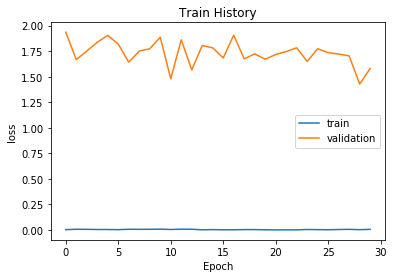

In [32]:
show_train_history(model_history_attention, 'loss', 'val_loss')

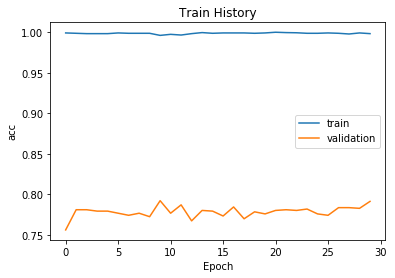

In [33]:
show_train_history(model_history_attention, 'acc', 'val_acc')

### Confusion Matrix

### Without Embedding